In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
net = cv2.dnn.readNet('yolov3.weights' , 'yolov3.cfg')

with open('coco.names' , 'r') as f:
    classes = f.read().splitlines()
    
cap = cv2.VideoCapture('Cars Moving On Road Stock Footage - Free Download.mp4')


while True:
    _ , img = cap.read()
    height , width , _ = img.shape
    blob = cv2.dnn.blobFromImage(img , 1/255,(416,416), swapRB=True,crop=False)


    net.setInput(blob)
    output_layers_names = net.getUnconnectedOutLayersNames()
    output_layers = net.forward(output_layers_names)

    boxes =[]
    confidents=[]
    class_ids=[]

    for output in output_layers:       
        for detection in output:       
            score=detection[5:]
            class_id = np.argmax(score)
            confident =score[class_id] 

            if confident > 0.5 :

                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width ) 
                h = int(detection[3] * height)

                x = int(center_x - w/2)
                y = int(center_y - h/2)

                # saving the details for each detection 
                boxes.append([x,y,w,h])
                confidents.append(float (confident))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes ,confidents , 0.5 , 0.4) 



    font = cv2.FONT_HERSHEY_PLAIN 
     

    for i in indexes.flatten(): 
        x,y,w,h = boxes[i]
        
        label = str(classes[class_ids[i]])
        confidence = str(round(confidents[i] , 2))
        

        cv2.rectangle(img , (x,y), (x+w , y+h) , (0,255,0) , 2) 
        cv2.putText(img , label + ' ' + confidence , (x , y+20 ) , font , 2, (255,0,0) , 2)
            
    cv2.imshow('image' , img)    
    key = cv2.waitKey(1) 
    if key == 27 :
        break

cap.release()
cv2.destroyAllWindows()   

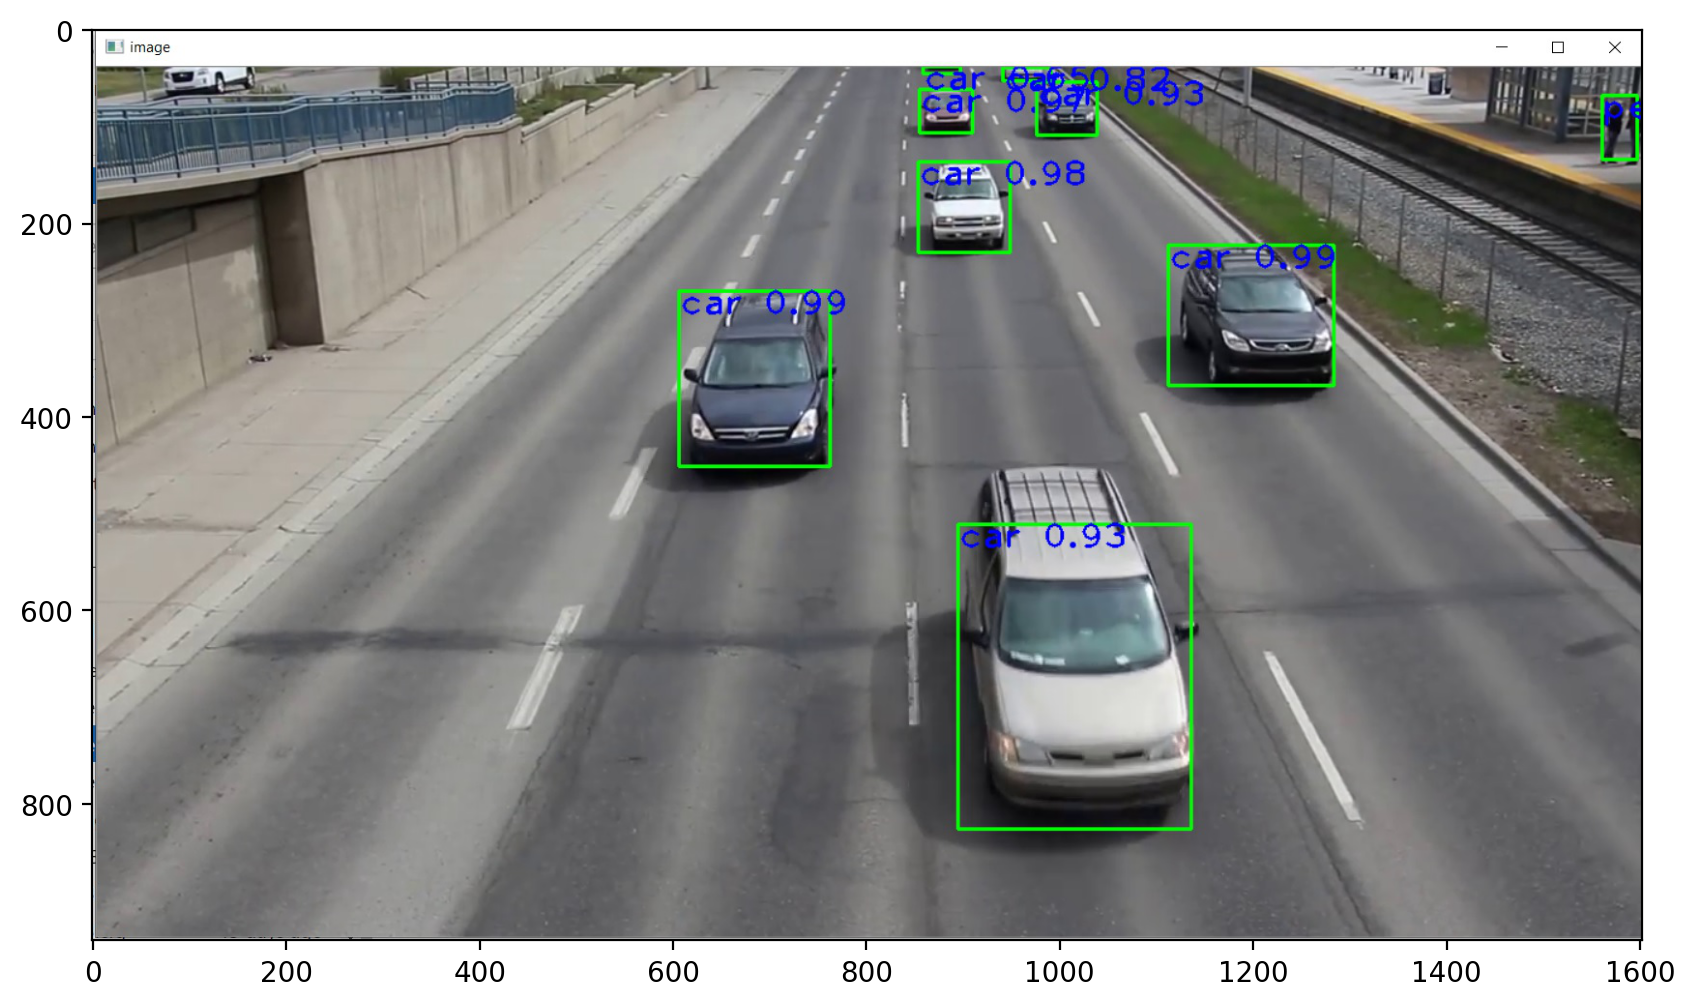

In [3]:
# the output from the code
road_result = cv2.cvtColor( cv2.imread('road_result.jpg') , cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,8), dpi =200)
plt.imshow(road_result);